## **NO 1. VISUALISASI DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Membaca Data**

Data disimpan didalam google drive dengan alamat "/content/drive/MyDrive/Colab Notebooks/Data Mining/Swarm_Behaviour.csv"

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data Mining/Swarm_Behaviour.csv', encoding= 'unicode_escape')
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [ ]:
df.isnull().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

Data mentah sudah bersih. Tidak mengandung missing value dan lain sebagainya

**Oversampling**

Untuk imbalanced data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


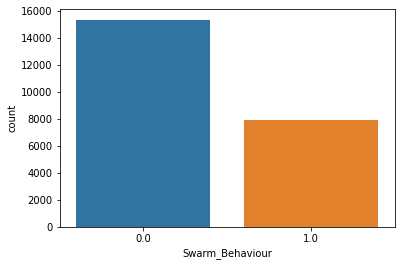

In [ ]:
sns.countplot(df["Swarm_Behaviour"])

Karena terdapat imbalanced data yang sangat jauh rentang pembedanya, maka diperlukan oversampling untuk menyeimbangkan data.

In [ ]:
import numpy as np # linear algebra
from numpy import genfromtxt

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN

In [ ]:
df['Swarm_Behaviour'].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

In [ ]:
pca = PCA(n_components=2)
df_2d = pd.DataFrame(pca.fit_transform(df.iloc[:,0:2400]))
df_2d

,0,1
0,-2902.930788,-1860.512460
1,-2907.478989,-1861.309657
2,-2905.708562,-1860.475415
3,-2908.945014,-1863.924024
4,-2881.187045,-1862.898684
...,...,...
23304,-2902.590852,-1862.759332
23305,-2906.207675,-1862.027175
23306,-2907.779834,-1856.919309
23307,-2907.071173,-1873.336053


In [ ]:
df_2d= pd.concat([df_2d, df['Swarm_Behaviour']], axis=1)
df_2d.columns = ['x', 'y', 'Swarm_Behaviour']
df_2d

,x,y,Swarm_Behaviour
0,-2902.930788,-1860.512460,0.0
1,-2907.478989,-1861.309657,0.0
2,-2905.708562,-1860.475415,0.0
3,-2908.945014,-1863.924024,0.0
4,-2881.187045,-1862.898684,0.0
...,...,...,...
23304,-2902.590852,-1862.759332,0.0
23305,-2906.207675,-1862.027175,0.0
23306,-2907.779834,-1856.919309,0.0
23307,-2907.071173,-1873.336053,0.0


In [ ]:
df_2d['Swarm_Behaviour'].unique()

array([0., 1.])

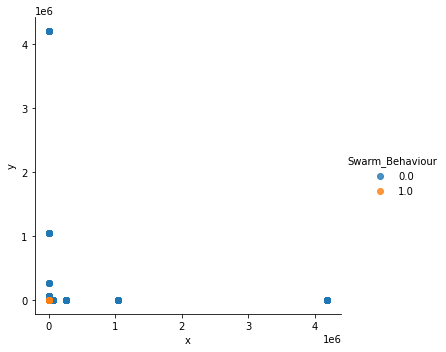

In [ ]:
sns.lmplot(x='x',y='y', data=df_2d, fit_reg=False, hue='Swarm_Behaviour')

In [ ]:
# !pip install scikit-learn==0.23.1
# !pip install imbalanced-learn==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 5.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 167 kB 5.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(df.iloc[:,0:2400], df['Swarm_Behaviour'])

In [ ]:
df_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_oversampled.columns = df.columns

In [ ]:
df_oversampled

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-15.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28,0,0.0
1,175.660000,-57.090000,2.310000,-2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.0
2,200.160000,-320.070000,4.010000,-6.370000,0.000000,0.000000,0.000000,0.000000,0.180000,-0.260000,...,-9.380000,0.000000,0.000000,0.000000,0.000000,-0.110000,-0.300000,15,1,0.0
3,316.990000,-906.840000,0.850000,9.170000,-0.170000,1.030000,0.000000,0.000000,0.000000,0.000000,...,10.390000,-0.260000,1.010000,0.000000,0.000000,0.000000,0.000000,16,0,0.0
4,1277.680000,908.540000,-2.020000,8.230000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,13.910000,-1.000000,0.000000,3.210000,15.670000,0.000000,0.000000,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1072.042150,-841.413304,-10.189097,-0.359142,0.260000,-0.970000,-3.785005,-0.779506,2.419939,1.129540,...,3.626746,0.224649,-0.968838,-3.605386,1.564205,1.181257,2.269662,59,6,1.0
30764,1112.434562,-839.921080,-14.295307,-1.163190,0.209297,-0.977243,-2.920591,-0.877350,1.315945,2.181947,...,-0.986379,0.140000,-0.990000,-2.449891,-2.297028,-0.084271,2.654487,60,7,1.0
30765,16.755667,386.290299,-0.447627,9.850531,-0.057482,1.040000,0.000000,0.000000,0.000000,0.000000,...,8.180000,0.020000,1.040000,0.000000,0.000000,0.000000,0.000000,16,0,1.0
30766,18.260466,352.510744,-0.464570,10.540198,-0.057086,1.040000,0.000000,0.000000,0.000000,0.000000,...,7.761920,-0.015430,1.040000,0.000000,0.000000,0.000000,0.000000,16,0,1.0


In [ ]:
df_oversampled.to_csv('df_oversampled.csv')

In [ ]:
files.download("df_oversampled.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_oversampled['Swarm_Behaviour'].value_counts()

1.0    15413
0.0    15355
Name: Swarm_Behaviour, dtype: int64

In [ ]:
df_2d_oversampled = pd.DataFrame(pca.transform(df_oversampled.iloc[:,0:2400]))
df_2d_oversampled = pd.concat([df_2d_oversampled, df_oversampled['Swarm_Behaviour']], axis=1)
df_2d_oversampled.columns = ['x', 'y', 'Swarm_Behaviour']

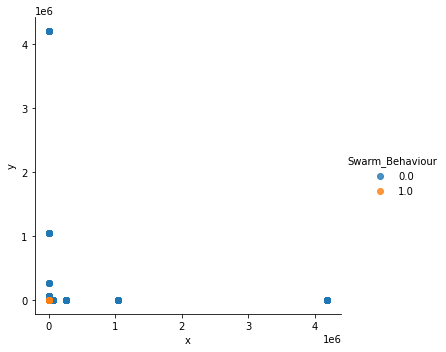

In [ ]:
sns.lmplot(x='x',y='y', data=df_2d_oversampled, fit_reg=False, hue='Swarm_Behaviour')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


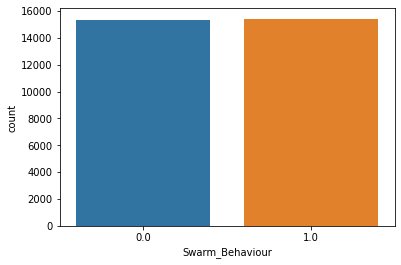

In [ ]:
sns.countplot(df_oversampled["Swarm_Behaviour"])

## **NO 2**

## **SLIDING WINDOW METHOD**

**Data Transformation**

Mereset index dengan mengganti nama index menjadi id

In [ ]:
# Create a unique id based on the index
df_oversampled = df_oversampled.reset_index()
df_oversampled = df_oversampled.rename(columns={"index": "id"})

df_oversampled

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-15.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28,0,0.0
1,1,175.660000,-57.090000,2.310000,-2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.0
2,2,200.160000,-320.070000,4.010000,-6.370000,0.000000,0.000000,0.000000,0.000000,0.180000,...,-9.380000,0.000000,0.000000,0.000000,0.000000,-0.110000,-0.300000,15,1,0.0
3,3,316.990000,-906.840000,0.850000,9.170000,-0.170000,1.030000,0.000000,0.000000,0.000000,...,10.390000,-0.260000,1.010000,0.000000,0.000000,0.000000,0.000000,16,0,0.0
4,4,1277.680000,908.540000,-2.020000,8.230000,-1.000000,1.000000,0.000000,0.000000,0.000000,...,13.910000,-1.000000,0.000000,3.210000,15.670000,0.000000,0.000000,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,30763,1072.042150,-841.413304,-10.189097,-0.359142,0.260000,-0.970000,-3.785005,-0.779506,2.419939,...,3.626746,0.224649,-0.968838,-3.605386,1.564205,1.181257,2.269662,59,6,1.0
30764,30764,1112.434562,-839.921080,-14.295307,-1.163190,0.209297,-0.977243,-2.920591,-0.877350,1.315945,...,-0.986379,0.140000,-0.990000,-2.449891,-2.297028,-0.084271,2.654487,60,7,1.0
30765,30765,16.755667,386.290299,-0.447627,9.850531,-0.057482,1.040000,0.000000,0.000000,0.000000,...,8.180000,0.020000,1.040000,0.000000,0.000000,0.000000,0.000000,16,0,1.0
30766,30766,18.260466,352.510744,-0.464570,10.540198,-0.057086,1.040000,0.000000,0.000000,0.000000,...,7.761920,-0.015430,1.040000,0.000000,0.000000,0.000000,0.000000,16,0,1.0


**Data Reduction**

Membagi menjadi 2 dataframe
1. Berisikan atribut id dan swarm_behaviour. Disimpan dalam variabel df_target
2. Berisikan semua atribut kecuali swarm_behaviour. Disimpan dalam variabel df_oversampled_new

In [ ]:
# Create target DataFrame
df_target = df_oversampled[["id","Swarm_Behaviour"]] #isinya cuman id dan swarm behaviour

df_oversampled_new = df_oversampled.drop(columns = ["Swarm_Behaviour","id"]) #isinya semua variabel tanpa swarm behaviour dan id

Dibagi menjadi 2 tabel, karena metode sliding window hanya dilakukan untuk data pada kolom 

['x', 'y', 'xVel', 'yVel', 'xA', 'yA', 'xS', 'yS', 'xC', 'yC', 'nAC', 'nS'] saja

**Metode Sliding Window**

Menggunakan fungsi rolling() median yang telah tersedia di library pandas

In [ ]:
df_sliding = df_oversampled_new.rolling(10, min_periods=1).median()
df_sliding

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.040000,-15.150000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,28.0,0.0
1,368.855000,-28.855000,-4.195000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-9.315000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,16.0,0.0
2,200.160000,-57.090000,2.310000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.020000,-9.380000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0
3,258.575000,-188.580000,1.580000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.730000,-6.430000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.5,0.0
4,316.990000,-57.090000,0.850000,-2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.440000,-3.480000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1084.140028,-662.823937,-7.296511,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.953195,0.889400,...,-3.125691,1.829975,0.140486,-0.34,-0.173467,-0.171007,0.389877,0.645714,112.0,7.0
30764,1097.738080,-664.774544,-7.831900,-0.861126,0.000000,0.000000,-0.342862,-0.325503,0.996941,1.090888,...,-4.528259,0.835911,0.140486,-0.34,-0.224893,-0.371636,0.389877,0.688973,112.0,7.0
30765,1097.738080,-662.823937,-7.831900,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.996941,1.090888,...,-4.500516,2.023392,0.140486,-0.34,-0.173467,-0.203368,0.176223,0.688973,86.0,7.0
30766,1097.738080,-154.983826,-7.831900,2.167211,-0.028543,0.022734,-0.170105,-0.141526,0.498368,1.090888,...,-4.946940,5.694333,0.140486,-0.34,-0.086632,0.000000,0.000000,0.557132,59.5,6.5


**Data Integration**

Menggabungkan data pada df_sliding dengan df_target. Syaratnya menggunakan kolom id. Sehingga diperlukan id unik baru dari tabel df_sliding. Hal ini bermaksud untuk menampilkan data yang telah melalui proses sliding window ditambah dengan atribut klas swarm_behaviour

In [ ]:
# Membuat id unik berdasarkan index pada tabel df_sliding agar nantinya dapat dicombine dengan atribut 'Swarm Behaviour' pada tabel df_target
df_sliding = df_sliding.reset_index()
df_sliding = df_sliding.rename(columns={"index": "id"})

df_sliding

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.040000,-15.150000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,28.0,0.0
1,1,368.855000,-28.855000,-4.195000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-9.315000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,16.0,0.0
2,2,200.160000,-57.090000,2.310000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.020000,-9.380000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0
3,3,258.575000,-188.580000,1.580000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.730000,-6.430000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.5,0.0
4,4,316.990000,-57.090000,0.850000,-2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.440000,-3.480000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,30763,1084.140028,-662.823937,-7.296511,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.953195,...,-3.125691,1.829975,0.140486,-0.34,-0.173467,-0.171007,0.389877,0.645714,112.0,7.0
30764,30764,1097.738080,-664.774544,-7.831900,-0.861126,0.000000,0.000000,-0.342862,-0.325503,0.996941,...,-4.528259,0.835911,0.140486,-0.34,-0.224893,-0.371636,0.389877,0.688973,112.0,7.0
30765,30765,1097.738080,-662.823937,-7.831900,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.996941,...,-4.500516,2.023392,0.140486,-0.34,-0.173467,-0.203368,0.176223,0.688973,86.0,7.0
30766,30766,1097.738080,-154.983826,-7.831900,2.167211,-0.028543,0.022734,-0.170105,-0.141526,0.498368,...,-4.946940,5.694333,0.140486,-0.34,-0.086632,0.000000,0.000000,0.557132,59.5,6.5


In [ ]:
# Menggabungkan tabel df_sliding dengan df_target
df_slidingwindow = df_sliding.merge(df_target, how='left', on='id')
df_slidingwindow

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-15.150000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,28.0,0.0,0.0
1,1,368.855000,-28.855000,-4.195000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.315000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,16.0,0.0,0.0
2,2,200.160000,-57.090000,2.310000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.380000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0,0.0
3,3,258.575000,-188.580000,1.580000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.430000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.5,0.0,0.0
4,4,316.990000,-57.090000,0.850000,-2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.480000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,30763,1084.140028,-662.823937,-7.296511,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.953195,...,1.829975,0.140486,-0.34,-0.173467,-0.171007,0.389877,0.645714,112.0,7.0,1.0
30764,30764,1097.738080,-664.774544,-7.831900,-0.861126,0.000000,0.000000,-0.342862,-0.325503,0.996941,...,0.835911,0.140486,-0.34,-0.224893,-0.371636,0.389877,0.688973,112.0,7.0,1.0
30765,30765,1097.738080,-662.823937,-7.831900,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.996941,...,2.023392,0.140486,-0.34,-0.173467,-0.203368,0.176223,0.688973,86.0,7.0,1.0
30766,30766,1097.738080,-154.983826,-7.831900,2.167211,-0.028543,0.022734,-0.170105,-0.141526,0.498368,...,5.694333,0.140486,-0.34,-0.086632,0.000000,0.000000,0.557132,59.5,6.5,1.0


In [ ]:
df_slidingwindow['Swarm_Behaviour'].value_counts()

1.0    15413
0.0    15355
Name: Swarm_Behaviour, dtype: int64

In [ ]:
df_slidingwindow.isnull().sum()

id                 0
x1                 0
y1                 0
xVel1              0
yVel1              0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2402, dtype: int64

id                 0
x1                 0
y1                 0
xVel1              0
yVel1              0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2402, dtype: int64

In [ ]:
df_slidingwindow.to_csv('df_slidingwindow.csv')
# files.download("df_slidingwindow.csv")

In [ ]:
files.download("df_slidingwindow.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Box Plot**

Bertujuan membandingkan outliers pada data sebelum di sliding window dan setelahnya

In [ ]:
bx_df_oversampled = df_oversampled.drop(columns = ["Swarm_Behaviour", "id"])
bx_df_oversampled

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.040000,-15.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28,0
1,175.660000,-57.090000,2.310000,-2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.040000,-3.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0
2,200.160000,-320.070000,4.010000,-6.370000,0.000000,0.000000,0.000000,0.000000,0.180000,-0.260000,...,-8.020000,-9.380000,0.000000,0.000000,0.000000,0.000000,-0.110000,-0.300000,15,1
3,316.990000,-906.840000,0.850000,9.170000,-0.170000,1.030000,0.000000,0.000000,0.000000,0.000000,...,-3.440000,10.390000,-0.260000,1.010000,0.000000,0.000000,0.000000,0.000000,16,0
4,1277.680000,908.540000,-2.020000,8.230000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,10.490000,13.910000,-1.000000,0.000000,3.210000,15.670000,0.000000,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1072.042150,-841.413304,-10.189097,-0.359142,0.260000,-0.970000,-3.785005,-0.779506,2.419939,1.129540,...,-7.150460,3.626746,0.224649,-0.968838,-3.605386,1.564205,1.181257,2.269662,59,6
30764,1112.434562,-839.921080,-14.295307,-1.163190,0.209297,-0.977243,-2.920591,-0.877350,1.315945,2.181947,...,-9.908004,-0.986379,0.140000,-0.990000,-2.449891,-2.297028,-0.084271,2.654487,60,7
30765,16.755667,386.290299,-0.447627,9.850531,-0.057482,1.040000,0.000000,0.000000,0.000000,0.000000,...,-3.240000,8.180000,0.020000,1.040000,0.000000,0.000000,0.000000,0.000000,16,0
30766,18.260466,352.510744,-0.464570,10.540198,-0.057086,1.040000,0.000000,0.000000,0.000000,0.000000,...,-4.132849,7.761920,-0.015430,1.040000,0.000000,0.000000,0.000000,0.000000,16,0


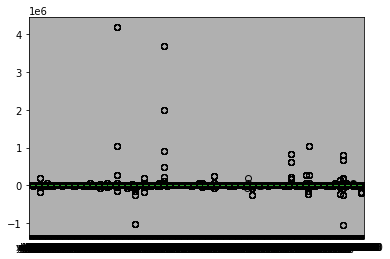

In [ ]:
bx_df_oversampled.boxplot()

In [ ]:
bx_df_slidingwindow = df_slidingwindow.drop(columns = ["Swarm_Behaviour", "id"])
bx_df_slidingwindow

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.040000,-15.150000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,28.0,0.0
1,368.855000,-28.855000,-4.195000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-9.315000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,16.0,0.0
2,200.160000,-57.090000,2.310000,-4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.020000,-9.380000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0
3,258.575000,-188.580000,1.580000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.730000,-6.430000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.5,0.0
4,316.990000,-57.090000,0.850000,-2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.440000,-3.480000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1084.140028,-662.823937,-7.296511,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.953195,0.889400,...,-3.125691,1.829975,0.140486,-0.34,-0.173467,-0.171007,0.389877,0.645714,112.0,7.0
30764,1097.738080,-664.774544,-7.831900,-0.861126,0.000000,0.000000,-0.342862,-0.325503,0.996941,1.090888,...,-4.528259,0.835911,0.140486,-0.34,-0.224893,-0.371636,0.389877,0.688973,112.0,7.0
30765,1097.738080,-662.823937,-7.831900,-0.595615,0.000000,0.000000,-0.342862,-0.263477,0.996941,1.090888,...,-4.500516,2.023392,0.140486,-0.34,-0.173467,-0.203368,0.176223,0.688973,86.0,7.0
30766,1097.738080,-154.983826,-7.831900,2.167211,-0.028543,0.022734,-0.170105,-0.141526,0.498368,1.090888,...,-4.946940,5.694333,0.140486,-0.34,-0.086632,0.000000,0.000000,0.557132,59.5,6.5


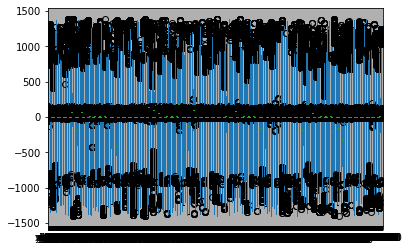

In [ ]:
bx_df_slidingwindow.boxplot()